In [47]:
dataframe = pd.read_csv("./business_analysis.csv")

In [48]:
dataframe.shape

(1486, 50)

In [49]:
import matplotlib.pyplot as plt

dataframe['category_group'].value_counts().plot(kind='bar')
plt.title("Businesses by Category Group")
plt.xlabel("Category Group")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Count")
plt.tight_layout()
plt.show()


Index(['index', 'name', 'category', 'category_group', 'address', 'city',
       'neighborhood', 'latitude', 'longitude', 'has_coordinates', 'plus_code',
       'phone', 'has_phone', 'website', 'has_website', 'needs_website',
       'rating', 'review_count', 'engagement_level', 'num_photos',
       'has_photos', 'num_review_photos', 'total_images',
       'num_reviews_with_text', 'reviews_with_photos', 'price_level',
       'has_opening_hours', 'days_with_hours', 'has_accessibility',
       'accessibility', 'has_amenities', 'amenities', 'has_payments',
       'payments', 'has_parking', 'parking', 'has_service_options',
       'service_options', 'has_highlights', 'highlights', 'data_completeness',
       'image_score', 'review_score', 'rating_score', 'overall_quality',
       'is_good_candidate', 'is_premium_candidate', 'maps_url', 'place_id',
       'scraped_at'],
      dtype='str')

In [50]:
# Data Quality & Lead Analysis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Data Completeness Distribution
axes[0, 0].hist(dataframe['data_completeness'].dropna(), bins=20, edgecolor='black', color='steelblue')
axes[0, 0].set_title('Data Completeness Distribution')
axes[0, 0].set_xlabel('Completeness Score (0-100)')
axes[0, 0].set_ylabel('Count')

# 2. Overall Quality Distribution
axes[0, 1].hist(dataframe['overall_quality'].dropna(), bins=20, edgecolor='black', color='teal')
axes[0, 1].set_title('Overall Quality Distribution')
axes[0, 1].set_xlabel('Quality Score (0-10)')
axes[0, 1].set_ylabel('Count')

# 3. Good Candidates vs Premium Candidates
candidate_data = [dataframe['is_good_candidate'].sum(), dataframe['is_premium_candidate'].notna().sum()]
axes[1, 0].bar(['Good Candidates', 'Premium Candidates'], candidate_data, color=['#4CAF50', '#FF9800'])
axes[1, 0].set_title('Lead Candidates Count')
axes[1, 0].set_ylabel('Count')

# 4. Contact Info Analysis
contact_data = {
    'Has Phone': dataframe['has_phone'].sum(),
    'Has Website': dataframe['has_website'].sum(),
    'Needs Website': dataframe['needs_website'].sum()
}
axes[1, 1].bar(contact_data.keys(), contact_data.values(), color=['#2196F3', '#9C27B0', '#F44336'])
axes[1, 1].set_title('Contact Information Analysis')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Key Statistic
print("=== DATA INSIGHTS ===")
print(f"Total businesses: {len(dataframe)}")
print(f"Average rating: {dataframe['rating'].mean():.2f}")
print(f"Average review count: {dataframe['review_count'].mean():.1f}")
print(f"Good candidates: {dataframe['is_good_candidate'].sum()} ({dataframe['is_good_candidate'].mean()*100:.1f}%)")
print(f"Businesses needing websites: {dataframe['needs_website'].sum()} ({dataframe['needs_website'].mean()*100:.1f}%)")
print(f"Average data completeness: {dataframe['data_completeness'].mean():.1f}%")

(1486, 50)

In [51]:
# Análisis de mejores prospectos para venta de websites
print("=== TOP PROSPECTOS PARA VENTA DE WEBSITES ===\n")

# Crear un score de probabilidad de compra basado en múltiples factores
prospects = dataframe[dataframe['needs_website'] == True].copy()

# Calcular score de prospecto
prospects['prospect_score'] = (
    prospects['rating'].fillna(0) * 2 +  # Buen rating = negocio establecido
    prospects['review_count'].clip(upper=500).fillna(0) / 50 +  # Reviews = actividad
    prospects['has_phone'].astype(int) * 3 +  # Tiene teléfono = contactable
    prospects['data_completeness'].fillna(0) / 10 +  # Datos completos = negocio organizado
    prospects['is_good_candidate'].astype(int) * 5 +  # Ya identificado como buen candidato
    (prospects['engagement_level'] == 'High').astype(int) * 3  # Alto engagement
)

# Ordenar por score
top_prospects = prospects.nlargest(20, 'prospect_score')[['name', 'category', 'city', 'rating', 'review_count', 'has_phone', 'phone', 'engagement_level', 'data_completeness', 'prospect_score']]

print(f"Total de negocios que necesitan website: {len(prospects)}")
print(f"Negocios con alta probabilidad de compra (score > 20): {len(prospects[prospects['prospect_score'] > 20])}\n")

print("=== TOP 20 MEJORES PROSPECTOS ===\n")
display(top_prospects)

# Resumen por categoría
print("\n=== DISTRIBUCIÓN POR CATEGORÍA (Top prospectos) ===")
print(top_prospects['category'].value_counts())

,index,name,category,category_group,address,city,neighborhood,latitude,longitude,has_coordinates,...,data_completeness,image_score,review_score,rating_score,overall_quality,is_good_candidate,is_premium_candidate,maps_url,place_id,scraped_at
0,0,Villa Morra Park,Restaurante,Food & Beverage,"Av. Mariscal López, Asunción 001411",Villa Morra,Villa Morra,-25.292925,-57.585849,True,...,75,2,1,3,6.25,True,False,NaN,NaN,2026-01-30T21:05:01.523686
1,1,D´Alepo Cocina,Restaurante,Food & Beverage,"Olegario Víctor Andrade, Senador Huey Pierce L...",Villa Morra,Villa Morra,-25.292925,-57.585849,True,...,90,2,2,3,7.70,True,False,NaN,NaN,2026-01-30T21:05:25.190359
2,2,Treffen Bistró Fusión,Restaurante,Food & Beverage,"&, Asunción 001411",Villa Morra,Villa Morra,-25.288145,-57.597478,True,...,90,2,1,2,6.37,True,False,NaN,NaN,2026-01-30T21:06:13.437743
3,3,Bucca Villa Morra,Restaurante paraguayo,Food & Beverage,"O'Higgins esq, Asunción 001411",Villa Morra,Villa Morra,-25.287036,-57.582974,True,...,90,2,1,2,6.37,True,False,NaN,NaN,2026-01-30T21:06:38.061151
4,4,La Tarantella Rooftop - Villamorra,Pizzería,Other,"Guido Spano, Asunción 001411",Villa Morra,Villa Morra,-25.287036,-57.582974,True,...,75,1,1,2,4.92,True,False,NaN,NaN,2026-01-30T21:06:58.949185


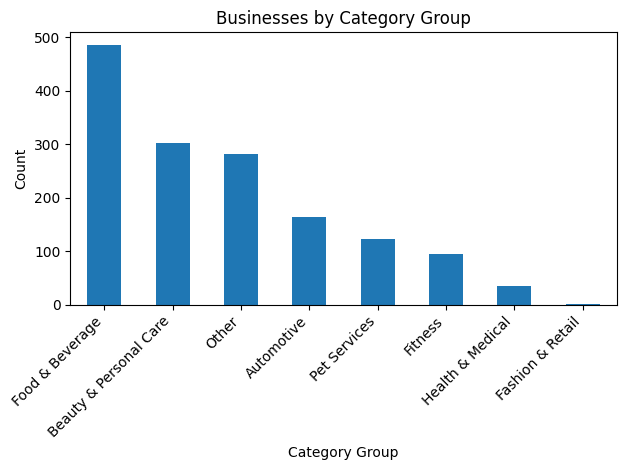

In [52]:
# Contar candidatos premium reales (excluyendo False y NaN)
premium_real = dataframe['is_premium_candidate'].apply(lambda x: x not in [False, 'False', None] and pd.notna(x)).sum()

print("=== CANDIDATOS PREMIUM ===")
print(f"Total de candidatos premium: {premium_real}")

# Mostrar algunos ejemplos de candidatos premium
premium_df = dataframe[dataframe['is_premium_candidate'].apply(lambda x: x not in [False, 'False', None] and pd.notna(x))]
print(f"\nEjemplos de candidatos premium:")
display(premium_df[['name', 'category', 'city', 'rating', 'phone', 'is_premium_candidate']].head(10))

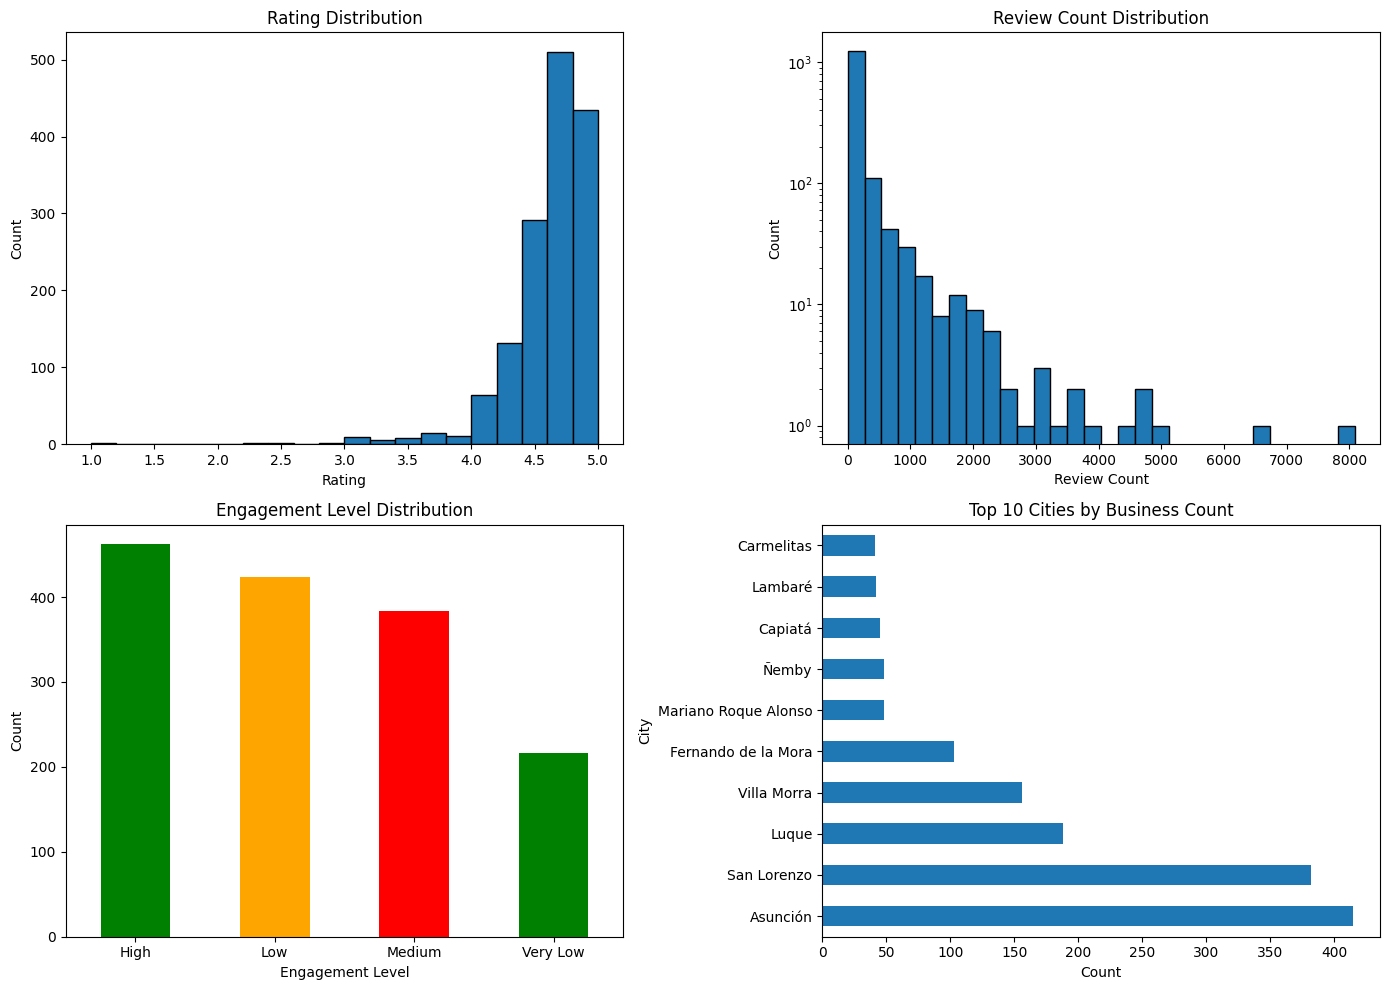

In [83]:
presence_cols = [
    'has_website',
    'has_phone',
    'has_photos',
    'has_opening_hours'
]

presence_rate = dataframe[presence_cols].mean() * 100
presence_rate.plot(kind='bar')
plt.title("Online Presence Coverage (%)")
plt.ylabel("Percentage")
plt.ylim(0, 100)
plt.show()


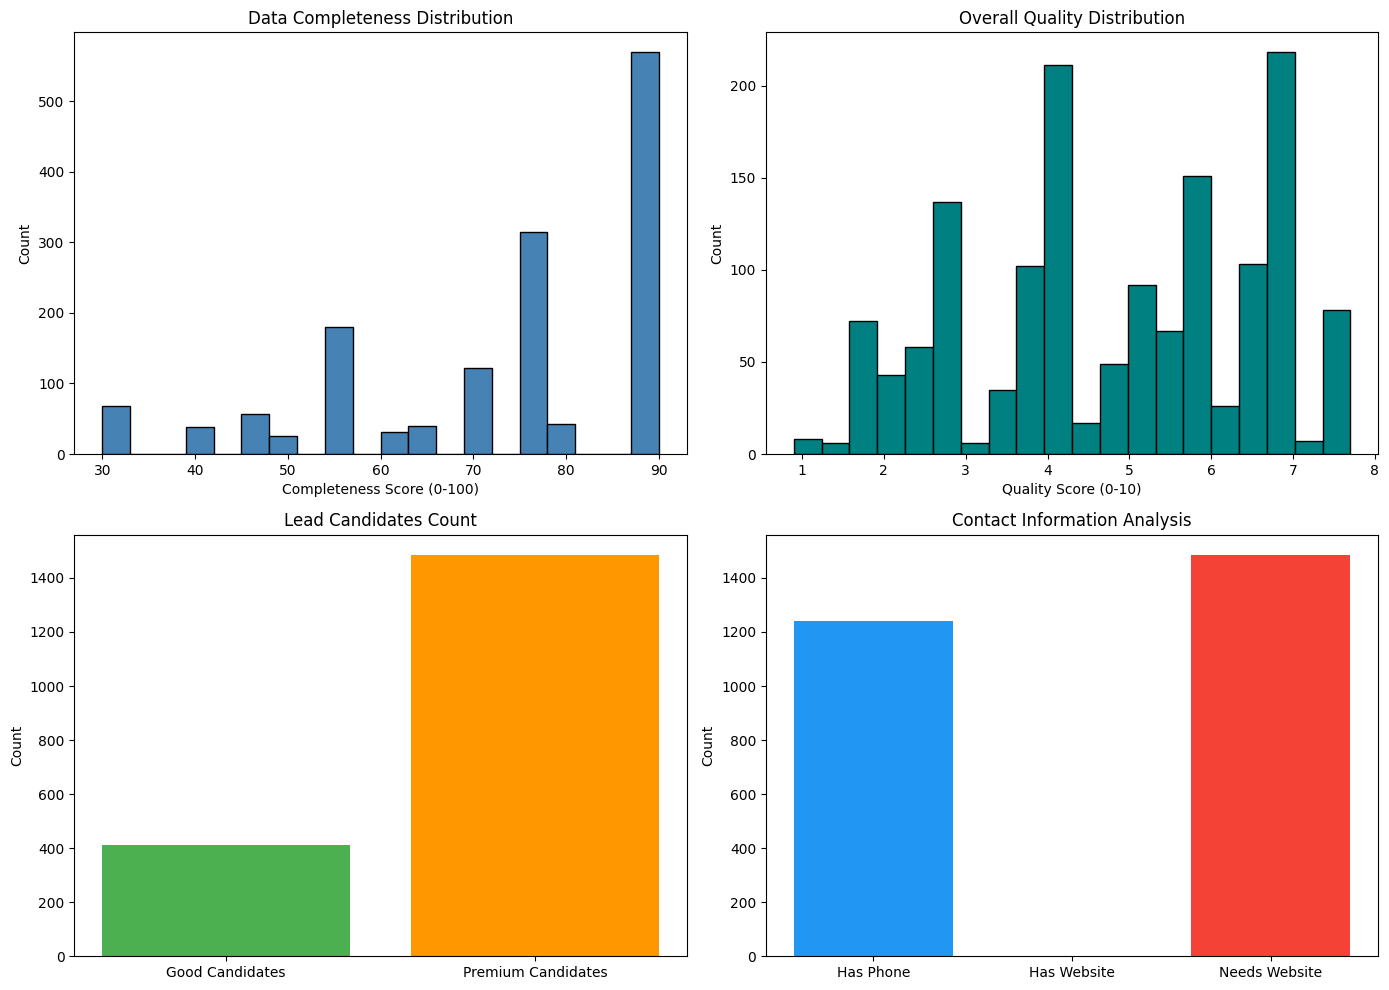

=== DATA INSIGHTS ===
Total businesses: 1486
Average rating: 4.62
Average review count: 209.5
Good candidates: 413 (27.8%)
Businesses needing websites: 1486 (100.0%)
Average data completeness: 73.0%


In [82]:
plt.hist(dataframe['rating'].dropna(), bins=10)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

plt.hist(dataframe['review_count'], bins=20)
plt.title("Review Count Distribution")
plt.xlabel("Number of Reviews")
plt.ylabel("Count")
plt.show()


In [84]:
candidate_counts = dataframe[['is_good_candidate', 'is_premium_candidate']].mean() * 100
candidate_counts.plot(kind='bar')
plt.title("Candidate Qualification Rate (%)")
plt.ylabel("Percentage of Businesses")
plt.show()


=== ANÁLISIS DE CANDIDATOS Y WEBSITES ===

Candidatos buenos: 413
Candidatos premium (registros con datos): 1486

=== ANÁLISIS DE WEBSITES ===
Total de registros: 1486
Registros CON website: 0
Registros SIN website: 1486
Registros que NECESITAN website: 1486 (100.0%)


In [85]:
# Reload fresh data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("./business_analysis.csv")
print(f"📦 Total businesses: {len(df)}")
print(f"📋 Columns: {list(df.columns)}")

=== TOP PROSPECTOS PARA VENTA DE WEBSITES ===

Total de negocios que necesitan website: 1486
Negocios con alta probabilidad de compra (score > 20): 1017

=== TOP 20 MEJORES PROSPECTOS ===



,name,category,city,rating,review_count,has_phone,phone,engagement_level,data_completeness,prospect_score
1445,HidroBaby | Babyspa | Spa de bebés | Hidroesti...,Spa y gimnasio,Asunción,5.0,731,True,\n0993 444000,High,90,40.0
179,Casa Burger Fernando de la Mora,Restaurante,Fernando de la Mora,4.8,1454,True,\n0985 689085,High,90,39.6
220,Tano El Italiano,Pizzería,Lambaré,4.8,617,True,\n0981 339349,High,90,39.6
11,Restaurante Su,Restaurante coreano,Villa Morra,4.7,1625,True,\n0962 287681,High,90,39.4
65,Restaurante Sukiyaki,Restaurante japonés,Centro,4.7,1660,True,\n0983 918643,High,90,39.4
439,Sotto Zero,Heladería,Villa Morra,4.7,986,True,\n0991 926077,High,90,39.4
764,Nantes Hospital Veterinario,Veterinario,Asunción,4.7,3010,True,\n0971 280025,High,90,39.4
5,El Café de Acá,Cafetería,Villa Morra,4.6,6514,True,\n0973 153040,High,90,39.2
14,Bellini Carmelitas,Restaurante italiano,Villa Morra,4.6,1795,True,\n(021) 623 967,High,90,39.2
16,Ese Lugar! Quinta Nauar,Restaurante,Villa Morra,4.6,870,True,\n(021) 604 061,High,90,39.2



=== DISTRIBUCIÓN POR CATEGORÍA (Top prospectos) ===
category
Restaurante             8
Restaurante italiano    4
Pizzería                2
Spa y gimnasio          1
Restaurante coreano     1
Restaurante japonés     1
Heladería               1
Veterinario             1
Cafetería               1
Name: count, dtype: int64


/var/folders/r7/dbv5f4xd49191l42tlc3_c8r0000gn/T/ipykernel_14997/3098651830.py:41: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


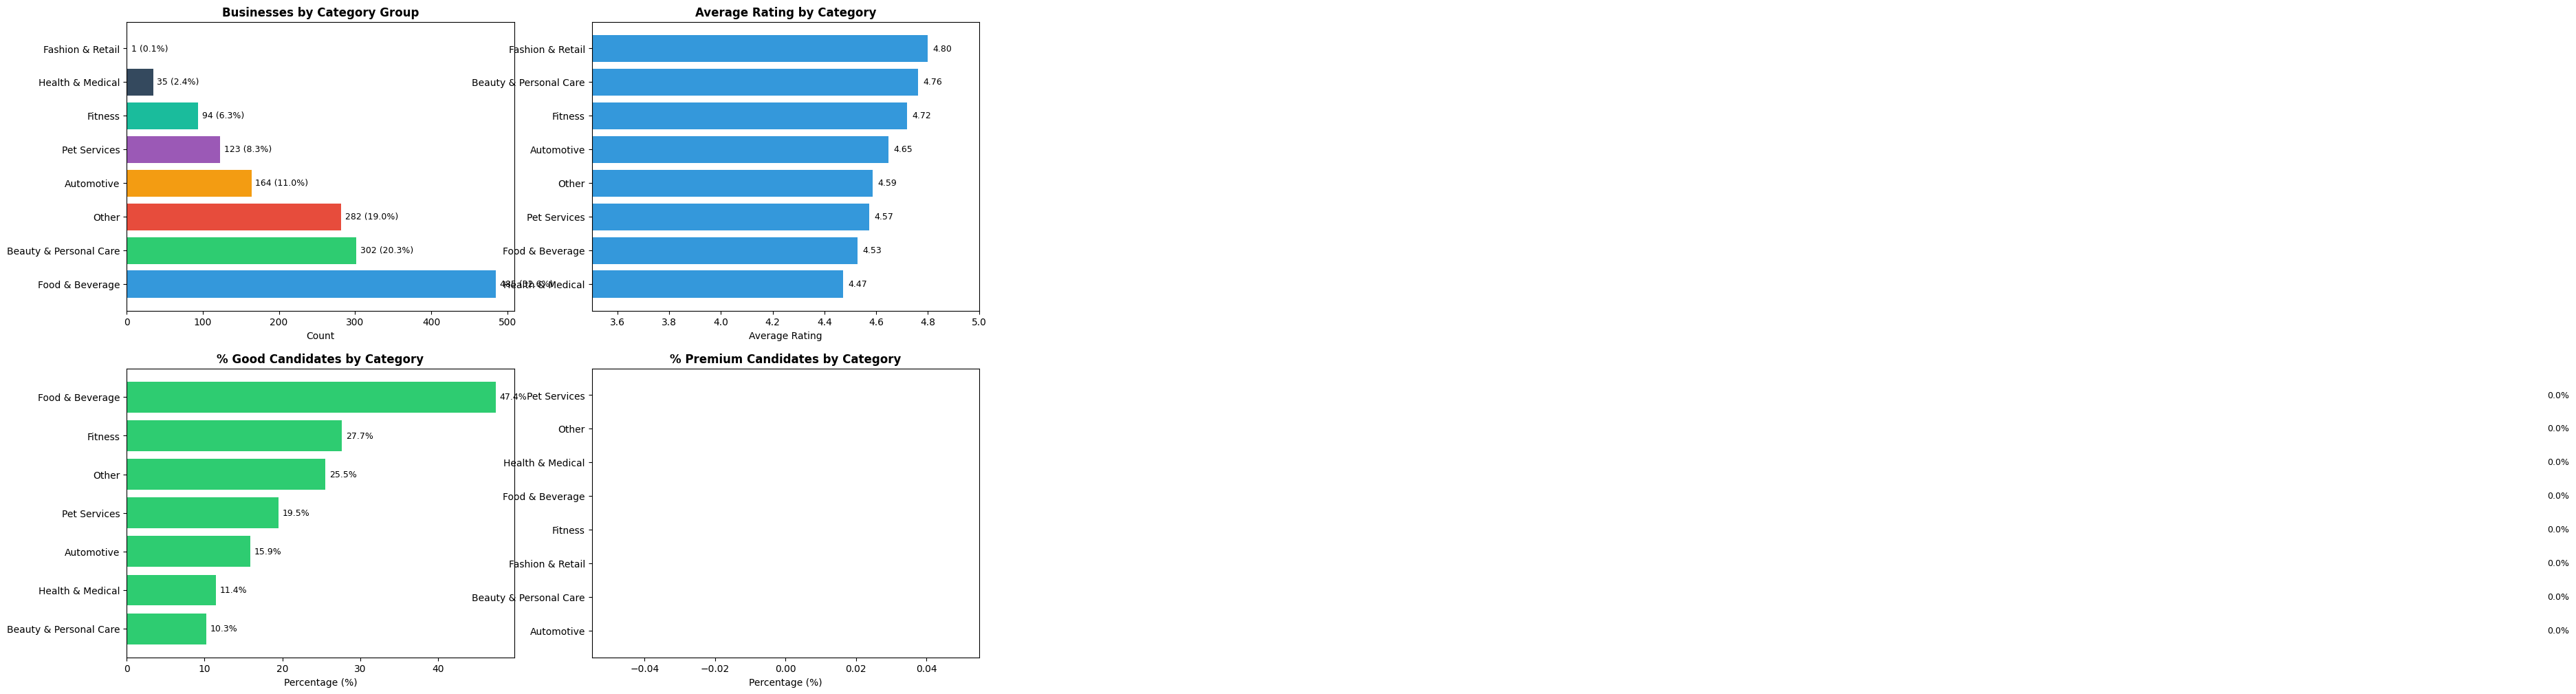

In [92]:
# 📂 CATEGORY ANALYSIS: Deep Dive by Business Type
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Category Groups - Horizontal Bar with counts
cat_counts = df['category_group'].value_counts()
colors = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12', '#9b59b6', '#1abc9c', '#34495e']
bars = axes[0, 0].barh(cat_counts.index, cat_counts.values, color=colors[:len(cat_counts)])
axes[0, 0].set_title('Businesses by Category Group', fontweight='bold', fontsize=12)
axes[0, 0].set_xlabel('Count')
for bar, val in zip(bars, cat_counts.values):
    axes[0, 0].text(val + 5, bar.get_y() + bar.get_height()/2, f'{val} ({val/len(df)*100:.1f}%)', va='center', fontsize=9)

# 2. Average Rating by Category
rating_by_cat = df.groupby('category_group')['rating'].mean().sort_values(ascending=True)
bars = axes[0, 1].barh(rating_by_cat.index, rating_by_cat.values, color='#3498db')
axes[0, 1].set_title('Average Rating by Category', fontweight='bold', fontsize=12)
axes[0, 1].set_xlabel('Average Rating')
axes[0, 1].set_xlim(3.5, 5)
for bar, val in zip(bars, rating_by_cat.values):
    axes[0, 1].text(val + 0.02, bar.get_y() + bar.get_height()/2, f'{val:.2f}', va='center', fontsize=9)

# 3. Good Candidates by Category
good_by_cat = df[df['is_good_candidate'] == True].groupby('category_group').size()
total_by_cat = df.groupby('category_group').size()
pct_good = (good_by_cat / total_by_cat * 100).sort_values(ascending=True)
bars = axes[1, 0].barh(pct_good.index, pct_good.values, color='#2ecc71')
axes[1, 0].set_title('% Good Candidates by Category', fontweight='bold', fontsize=12)
axes[1, 0].set_xlabel('Percentage (%)')
for bar, val in zip(bars, pct_good.values):
    axes[1, 0].text(val + 0.5, bar.get_y() + bar.get_height()/2, f'{val:.1f}%', va='center', fontsize=9)

# 4. Premium Candidates by Category
premium_by_cat = df[df['is_premium_candidate'] == True].groupby('category_group').size()
pct_premium = (premium_by_cat / total_by_cat * 100).fillna(0).sort_values(ascending=True)
bars = axes[1, 1].barh(pct_premium.index, pct_premium.values, color='#f39c12')
axes[1, 1].set_title('% Premium Candidates by Category', fontweight='bold', fontsize=12)
axes[1, 1].set_xlabel('Percentage (%)')
for bar, val in zip(bars, pct_premium.values):
    axes[1, 1].text(val + 0.5, bar.get_y() + bar.get_height()/2, f'{val:.1f}%', va='center', fontsize=9)

plt.tight_layout()
plt.show()

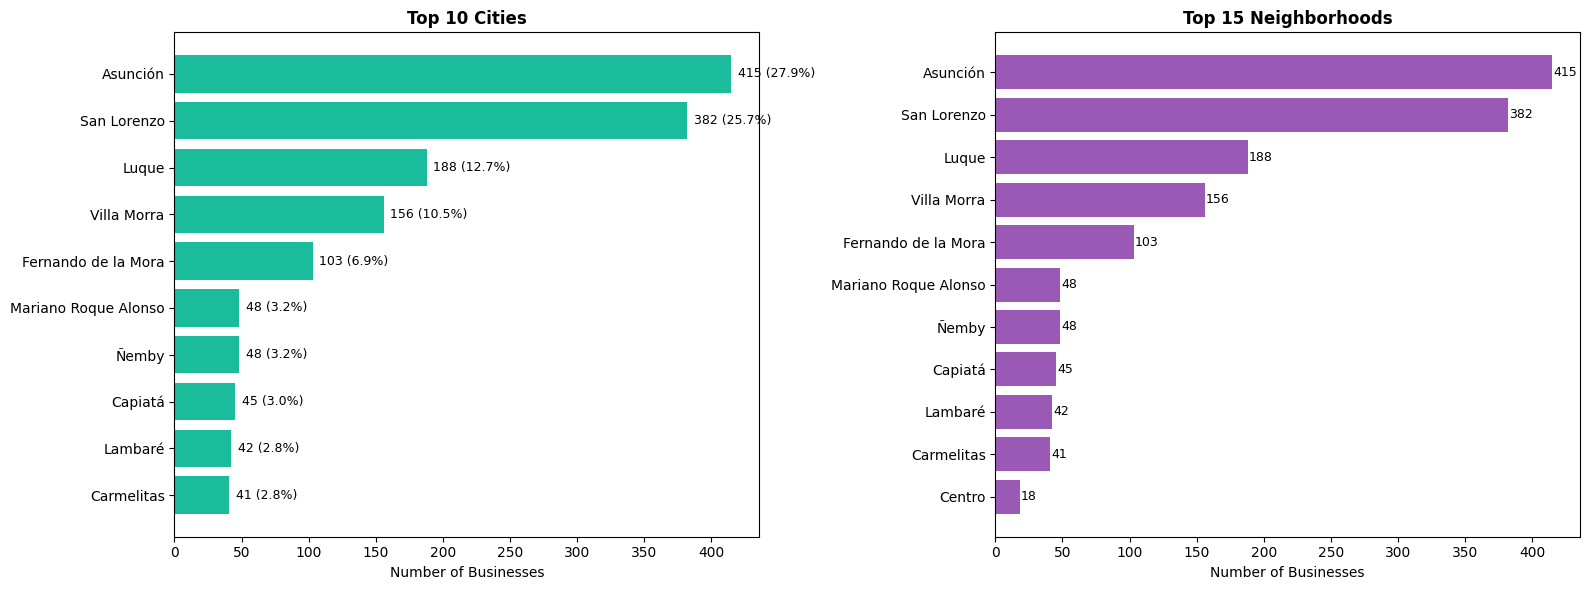


🗺️ GEOGRAPHIC SUMMARY
Total unique cities: 11
Total unique neighborhoods: 11

Top 5 cities:
   • Asunción: 415 businesses (27.9%)
   • San Lorenzo: 382 businesses (25.7%)
   • Luque: 188 businesses (12.7%)
   • Villa Morra: 156 businesses (10.5%)
   • Fernando de la Mora: 103 businesses (6.9%)


In [93]:
# 🗺️ GEOGRAPHIC ANALYSIS: Cities & Neighborhoods
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Top Cities
city_counts = df['city'].value_counts().head(10)
bars = axes[0].barh(city_counts.index[::-1], city_counts.values[::-1], color='#1abc9c')
axes[0].set_title('Top 10 Cities', fontweight='bold', fontsize=12)
axes[0].set_xlabel('Number of Businesses')
for bar, val in zip(bars, city_counts.values[::-1]):
    axes[0].text(val + 5, bar.get_y() + bar.get_height()/2, f'{val} ({val/len(df)*100:.1f}%)', va='center', fontsize=9)

# 2. Top Neighborhoods
neighborhood_counts = df['neighborhood'].value_counts().head(15)
bars = axes[1].barh(neighborhood_counts.index[::-1], neighborhood_counts.values[::-1], color='#9b59b6')
axes[1].set_title('Top 15 Neighborhoods', fontweight='bold', fontsize=12)
axes[1].set_xlabel('Number of Businesses')
for bar, val in zip(bars, neighborhood_counts.values[::-1]):
    axes[1].text(val + 1, bar.get_y() + bar.get_height()/2, str(val), va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Geographic summary
print("\n" + "="*60)
print("🗺️ GEOGRAPHIC SUMMARY")
print("="*60)
print(f"Total unique cities: {df['city'].nunique()}")
print(f"Total unique neighborhoods: {df['neighborhood'].nunique()}")
print(f"\nTop 5 cities:")
for city, count in city_counts.head(5).items():
    print(f"   • {city}: {count} businesses ({count/len(df)*100:.1f}%)")